In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
#img de treino, rotulo treino / mg de teste, rotulos teste = passamos para as datas
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#mostrando matriz de imagens
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#analisando tamanho e forma da matriz de treino de imagens e rotulos
len(train_images) #60k (28,28) imagens de treino
len(train_labels)#60k rotulos
train_images.shape

(60000, 28, 28)

In [5]:
#analisando tamanho e forma da matriz de teste de imagens e rotulos
len(test_images)#60k (28,28)
len(test_labels)#60k rotulos
train_images.shape


(60000, 28, 28)

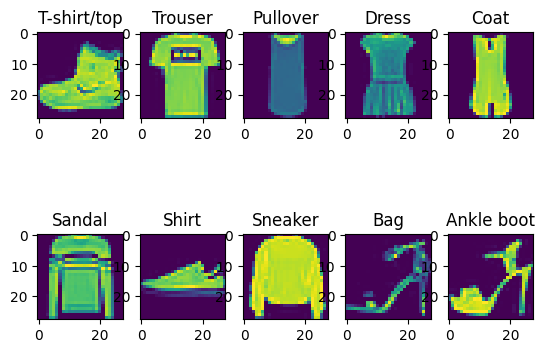

In [6]:
#mostrando imagens com rotulos utilizando o pyplot
train_labels.max()
total_class = 10
nome_classificacoes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for imagem in range(total_class):
    plt.subplot(2,5, imagem+1)
    plt.imshow(train_images[imagem])
    plt.title(nome_classificacoes[imagem]) #F004
    

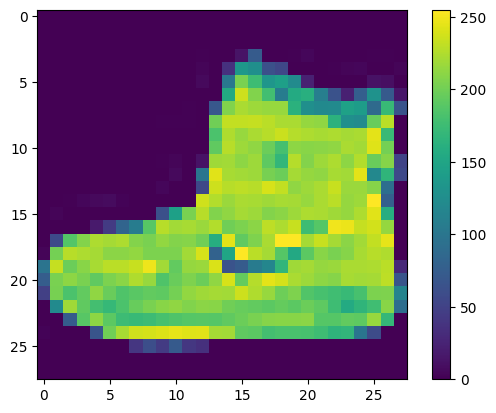

In [7]:
#analisando cores da imagem
plt.imshow(train_images[0])
plt.colorbar()


In [8]:
train_images = train_images/float(255) #processo de normalizacao para reduzir perda em relacao a cores
modelo = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),#camada 0 achatamento
                               tf.keras.layers.Dense(256, activation=tf.nn.relu)# camada 1 associando funcoes de redes neurais ao dados, Relu zera as saidas de x negativo e mantem os x positivos
                               #, tf.keras.layers.Dense(128, activation=tf.nn.relu)
                               #,tf.keras.layers.Dense(64, activation=tf.nn.relu)
                               ,tf.keras.layers.Dense(10,activation=tf.nn.softmax)#funcao de saida que soma as probabilidades/ camada 1
                               ])


c:\Users\joseb\Desktop\Estudos DEEPLEARNING\DeepLearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#compilando modelo
modelo.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
modelo.fit(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7899 - loss: 0.6001


In [11]:
#testando modelo
testes = modelo.predict(test_images)
#mostrando o rotulo obtido com a imagem teste em cima do modelo criado acima
print(f'resultado: ',np.argmax(testes[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
resultado:  2


In [12]:
#mostrando o rotulo original para comparar com o obtido acima
print(f'numero da imagem de teste: ', test_labels[1])

numero da imagem de teste:  2


In [13]:
perda_teste, acuracia_teste = modelo.evaluate(test_images, test_labels)#F015

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8445 - loss: 58.8978
